In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### MNIST dataset

In [3]:
# Function to one-hot encode the target variable into the 10 classes (0-9)
# Input shape: (N,),    Output: (N, 10)
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [4]:
# Loading the MNIST dataset
train_data=pd.read_csv(r"./mnist_train.csv")
test_data=pd.read_csv(r"./mnist_test.csv")

# Preprocessing the data
train_data=train_data.to_numpy()    # train_data shape: (60000, 785)
test_data=test_data.to_numpy()      # test_data shape: (10000, 785)

X_train=train_data[:,1:]            # X_train shape: (60000, 784)
y_train=train_data[:,0]             # y_train shape: (60000,)
X_test=test_data[:,1:]              # X_test shape: (10000, 784)
y_test=test_data[:,0]               # y_test shape: (10000,)

X_train = X_train / 255.0           # Normalizing the data
X_test = X_test / 255.0

one_hot_y_train = one_hot(y_train)  # one_hot_y_train shape: (60000, 10)
one_hot_y_test = one_hot(y_test)    # one_hot_y_test shape: (10000, 10)

In [13]:
def inputs(n):
    result = []
    if(n==2):
        for i in range(2):
            for j in range(2):
                result.append((i,j))
    else:
        for a in range(2):
            for b in range(2):
                for c in range(2):
                    for d in range(2):
                        for e in range(2):
                            result.append((a,b,c,d,e))
    
    result = np.array(result)
    return result

def outputs_xor(x):
    ans = []
    for a in x:
        if(a[0]==a[1]):
            ans.append((1,0))
        else:
            ans.append((0,1))
    ans = np.array(ans)
    return ans

def outputs_palindrome(x):
    ans = []
    for a in x:
        if np.array_equal(a, a[::-1]):
            ans.append((0,1))
        else:
            ans.append((1,0))
    ans = np.array(ans)
    return ans

def outputs_parity(x):
    ans = []
    for a in x:
        cnt = 0
        for i in range(5):
            cnt = cnt + a[i]
        if(cnt%2==0):
            ans.append((0,1))
        else:
            ans.append((1,0))
    ans = np.array(ans)
    return ans

In [14]:
###
x_twoInput = inputs(2)

x_fiveInput =inputs(5)

yXOR=outputs_xor(x_twoInput)
yPalindrome5=outputs_palindrome(x_fiveInput)

yParity5=outputs_parity(x_fiveInput)


#### Training on the other Boolean functions

In [6]:
# def sigmoid(z):
# return 1 / (1 + np.exp(-z))

# def cross_entropy_loss(y_true, y_pred):
# return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# def mse_loss(y_true, y_pred):
# return np.mean((y_true - y_pred) ** 2)

# def gradient_descent(X, y, loss_function, lr=0.1, epochs=100000):
# m, n = X.shape
# W = np.random.randn(n, 1) * 0.01 # Small weight initialization
# losses = []

# for epoch in range(epochs):
# z = X @ W
# y_pred = sigmoid(z)

# y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7) # Prevent extreme values

# ce_loss = cross_entropy_loss(y, y_pred)
# mse_loss_value = mse_loss(y, y_pred)

# if loss_function == "cross_entropy":
# loss = ce_loss
# grad = X.T @ (y_pred - y) / m
# elif loss_function == "mse":
# loss = mse_loss_value
# grad = X.T @ ((y_pred - y) * y_pred * (1 - y_pred)) / m
# # print(grad)
# W -= lr * grad
# losses.append(loss)

# if epoch % 100 == 0:
# print(f"Epoch {epoch}, CE Loss: {ce_loss:.5f}, MSE Loss: {mse_loss_value:.5f}")

# print(f"Final Weights ({loss_function}): \n{W}")
# return W, losses

In [5]:
#different activation functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def mse(y_true,y_pred):
    return np.sum((y_true-y_pred)**2)/y_true.shape[0]

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m #to avoid division with 0

#############


def predictionFinal(y_raw_pred):
    # call this only in case of 2 class classification
    
    placeholder=np.zeros_like(y_raw_pred)
    
    for i in range(len(placeholder)):
        for j in range(len(placeholder[0])):
            if y_raw_pred[i][j]>0.5:
                placeholder[i][j]=1
            else:
                continue
    
    print("Prediction")
    print(placeholder)

def predictionMultiClass(y_raw_pred):
    placeholder=np.zeros(len(y_raw_pred))
    for i in range(len(y_raw_pred)):
        placeholder[i]=np.argmax(y_raw_pred[i])
    print(placeholder)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation="relu", lr=0.01):
        self.lr = lr
        self.activation_type = activation
        self.output_size=output_size
        # Initialize weights and biases
        self.W1 = np.random.rand(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.rand(hidden_size,output_size)
        self.b2 = np.zeros((1, output_size))
        self.crossEntropyLoss=[]
        self.mseLoss=[]
        self.iters=[]

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        if self.activation_type=="sigmoid":
            self.A1=sigmoid(self.Z1)
        else:
            self.A1 = relu(self.Z1) if self.activation_type == "relu" else softmax(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2) # using Softmax for the output layer
        return self.A2

    def backward(self, X, y_true):
        m=X.shape[0]
        
        dZ2=self.A2-y_true
        dW2=np.dot(self.A1.T, dZ2) / m
        db2=np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1=np.dot(dZ2, self.W2.T)
        if self.activation_type=="sigmoid":
            dZ1=dA1* sigmoid_derivative(self.Z1)
        else:
            dZ1=dA1* relu_derivative(self.Z1) if self.activation_type == "relu" else dA1 # No derivative for softmax at hidden layer
        
        dW1=np.dot(X.T, dZ1) / m
        db1=np.sum(dZ1, axis=0, keepdims=True) / m
        
        self.W1-=self.lr*dW1
        self.b1-=self.lr*db1
        self.W2-=self.lr*dW2
        self.b2-=self.lr*db2

    def train(self, X, y, printEvery, epochs=10000):
        for i in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y)
            if i % 50000 == 0 or (printEvery and i%50==0):
                crossloss = cross_entropy(y, y_pred)
                mseloss = mse(y,y_pred)
                self.crossEntropyLoss.append(crossloss)
                self.mseLoss.append(mseloss)
                print(f"Epoch {i}, CrossLoss: {crossloss:.6f}, MSELoss: {mseloss:.6f}")
                self.iters.append(i)
            if i==epochs-1:
                # print("Prediction")
                if self.output_size>2:
                    predictionMultiClass(y_pred)
                else:
                    predictionFinal(y_pred)
                # print(y_pred)
        # print("W1")
        # print(self.W1)
        # print("W2")
        # print(self.W2)

# nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=2, activation="sigmoid", lr=1)
# nn.train(X, y, epochs=100000)

# def plotting:
#     plt.figure()
#     plt.plot(nn.iters,nn.losses_plot)
#     plt.show()

def plot_func(iters, losses, inputs, losstype):
    plt.figure()
    plt.plot(iters, losses)
    plt.ylabel(losstype)
    plt.xlabel("iterations")
    plt.title(inputs)
    plt.show()

In [8]:
# x=np.array([1,5,3,6,4,0,2])
# print(np.argmax(x))
# s="abhilasha"
# print(s[::-1])


In [17]:
np.random.seed(0)
nnXOR = NeuralNetwork(input_size=2, hidden_size=4, output_size=2, activation="sigmoid", lr=5)
nnXOR.train(x_twoInput, yXOR,0, epochs=500000)

Epoch 0, CrossLoss: 0.705510, MSELoss: 0.512266
Epoch 50000, CrossLoss: 0.000019, MSELoss: 0.000000
Epoch 100000, CrossLoss: 0.000009, MSELoss: 0.000000
Epoch 150000, CrossLoss: 0.000006, MSELoss: 0.000000
Epoch 200000, CrossLoss: 0.000005, MSELoss: 0.000000
Epoch 250000, CrossLoss: 0.000004, MSELoss: 0.000000
Epoch 300000, CrossLoss: 0.000003, MSELoss: 0.000000
Epoch 350000, CrossLoss: 0.000003, MSELoss: 0.000000
Epoch 400000, CrossLoss: 0.000002, MSELoss: 0.000000
Epoch 450000, CrossLoss: 0.000002, MSELoss: 0.000000
Prediction
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


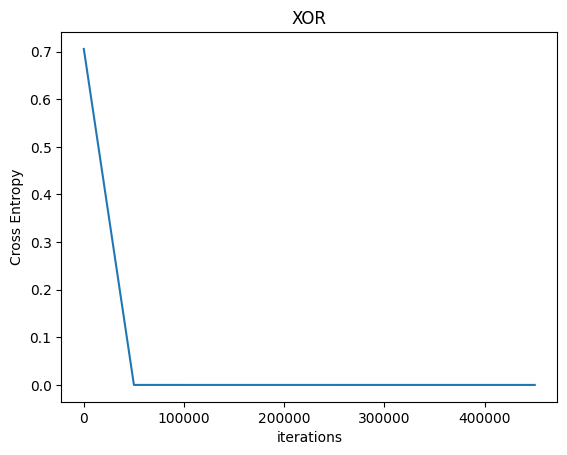

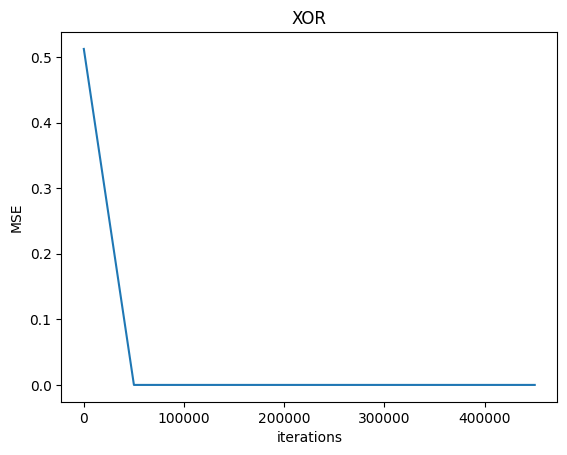

In [20]:
plot_func(nnXOR.iters,nnXOR.crossEntropyLoss,"XOR","Cross Entropy")
plot_func(nnXOR.iters,nnXOR.mseLoss,"XOR","MSE")

In [19]:
nnParity = NeuralNetwork(input_size=5, hidden_size=32, output_size=2, activation="sigmoid", lr=5)
nnParity.train(x_fiveInput, yParity5,0, epochs=500000)

Epoch 0, CrossLoss: 0.796344, MSELoss: 0.592484
Epoch 50000, CrossLoss: 0.084624, MSELoss: 0.052139
Epoch 100000, CrossLoss: 0.084541, MSELoss: 0.052106
Epoch 150000, CrossLoss: 0.084515, MSELoss: 0.052096
Epoch 200000, CrossLoss: 0.000029, MSELoss: 0.000000
Epoch 250000, CrossLoss: 0.000013, MSELoss: 0.000000
Epoch 300000, CrossLoss: 0.000009, MSELoss: 0.000000
Epoch 350000, CrossLoss: 0.000007, MSELoss: 0.000000
Epoch 400000, CrossLoss: 0.000006, MSELoss: 0.000000
Epoch 450000, CrossLoss: 0.000005, MSELoss: 0.000000
Prediction
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


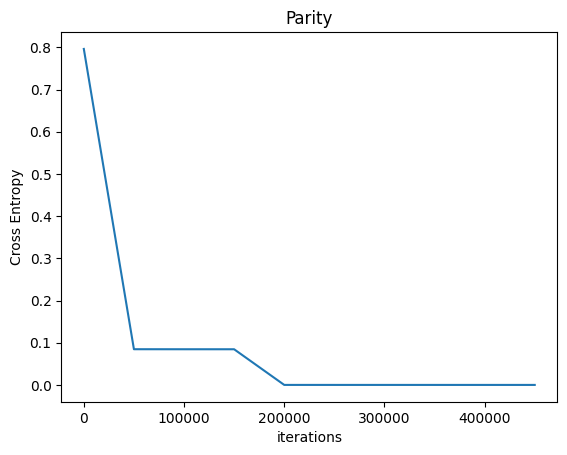

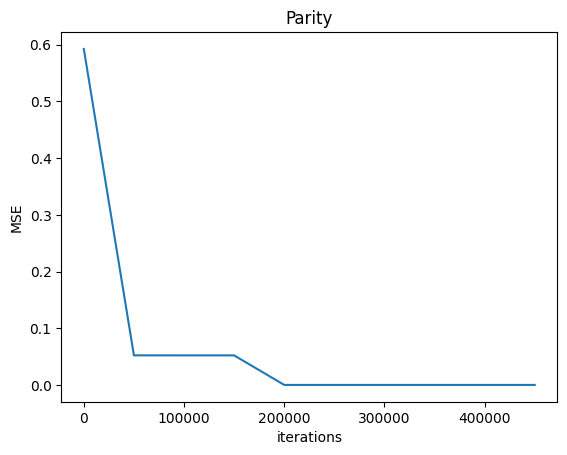

In [21]:
plot_func(nnParity.iters,nnParity.crossEntropyLoss,"Parity","Cross Entropy")
plot_func(nnParity.iters,nnParity.mseLoss,"Parity","MSE")

In [23]:
nnPal= NeuralNetwork(input_size=5, hidden_size=32, output_size=2, activation="sigmoid", lr=5)
nnPal.train(x_fiveInput, yPalindrome5, 0,epochs=500000)

Epoch 0, CrossLoss: 0.597101, MSELoss: 0.406332
Epoch 50000, CrossLoss: 0.000014, MSELoss: 0.000000
Epoch 100000, CrossLoss: 0.000007, MSELoss: 0.000000
Epoch 150000, CrossLoss: 0.000004, MSELoss: 0.000000
Epoch 200000, CrossLoss: 0.000003, MSELoss: 0.000000
Epoch 250000, CrossLoss: 0.000003, MSELoss: 0.000000
Epoch 300000, CrossLoss: 0.000002, MSELoss: 0.000000
Epoch 350000, CrossLoss: 0.000002, MSELoss: 0.000000
Epoch 400000, CrossLoss: 0.000002, MSELoss: 0.000000
Epoch 450000, CrossLoss: 0.000001, MSELoss: 0.000000
Prediction
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


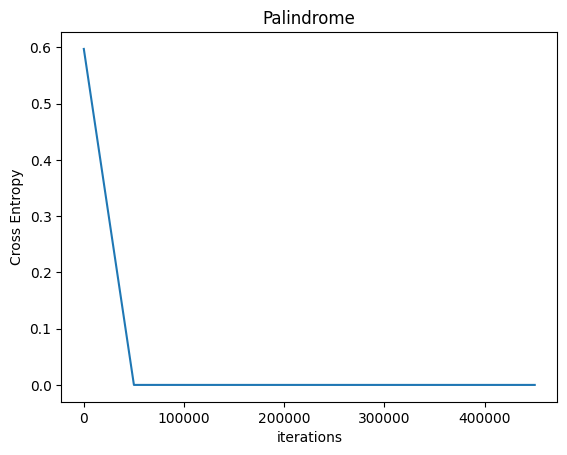

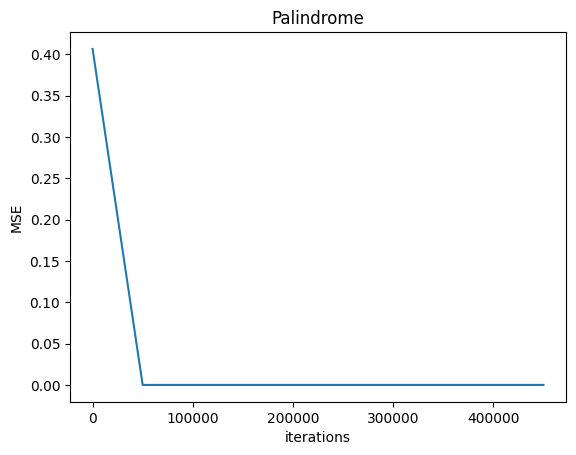

In [24]:
plot_func(nnPal.iters,nnPal.crossEntropyLoss,"Palindrome","Cross Entropy")
plot_func(nnPal.iters,nnPal.mseLoss,"Palindrome","MSE")

In [7]:
for i in one_hot_y_train:
    print(i)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0

In [1]:
print("hello")

hello


In [13]:
nnMNIST= NeuralNetwork(input_size=784, hidden_size=28, output_size=10, activation="relu", lr=0.01)
nnMNIST.train(X_train[:10000], one_hot_y_train[:10000], 1,epochs=1000)

Epoch 0, CrossLoss: 17.553465, MSELoss: 1.796442
Epoch 50, CrossLoss: 17.726688, MSELoss: 1.797759
Epoch 100, CrossLoss: 17.840841, MSELoss: 1.788880
Epoch 150, CrossLoss: 17.040864, MSELoss: 1.748786
Epoch 200, CrossLoss: 17.851272, MSELoss: 1.778344
Epoch 250, CrossLoss: 13.394054, MSELoss: 1.415689
Epoch 300, CrossLoss: 8.839987, MSELoss: 0.994134
Epoch 350, CrossLoss: 7.156865, MSELoss: 1.006274
Epoch 400, CrossLoss: 6.965672, MSELoss: 0.982457
Epoch 450, CrossLoss: 5.423651, MSELoss: 0.652121
Epoch 500, CrossLoss: 5.493072, MSELoss: 0.701660
Epoch 550, CrossLoss: 4.659286, MSELoss: 0.631105
Epoch 600, CrossLoss: 2.354947, MSELoss: 0.456571
Epoch 650, CrossLoss: 4.139409, MSELoss: 0.562048
Epoch 700, CrossLoss: 2.024516, MSELoss: 0.410391
Epoch 750, CrossLoss: 2.596964, MSELoss: 0.466993
Epoch 800, CrossLoss: 3.982523, MSELoss: 0.591960
Epoch 850, CrossLoss: 2.529847, MSELoss: 0.429365
Epoch 900, CrossLoss: 3.120041, MSELoss: 0.466175
Epoch 950, CrossLoss: 3.680274, MSELoss: 0.5225

In [16]:
def test(model, X_test):
        model.Z1 = np.dot(X_test, model.W1) + model.b1
        model.A1=softmax(model.Z1)
        model.Z2 = np.dot(model.A1, model.W2) + model.b2
        model.A2 = softmax(model.Z2) # using Softmax for the output layer
        return model.A2

pred=test(nnMNIST,X_test)
predictionMultiClass(pred)

[7. 2. 1. ... 4. 4. 0.]


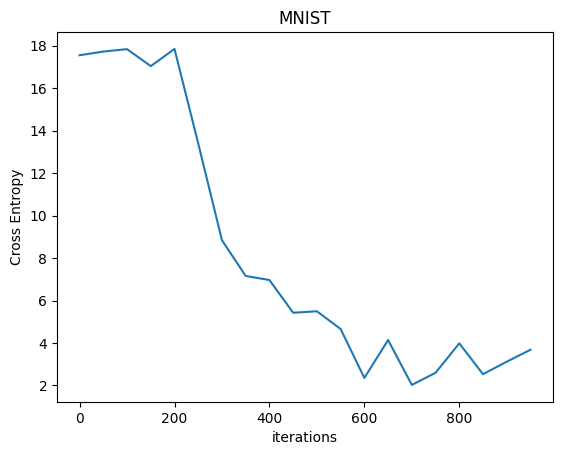

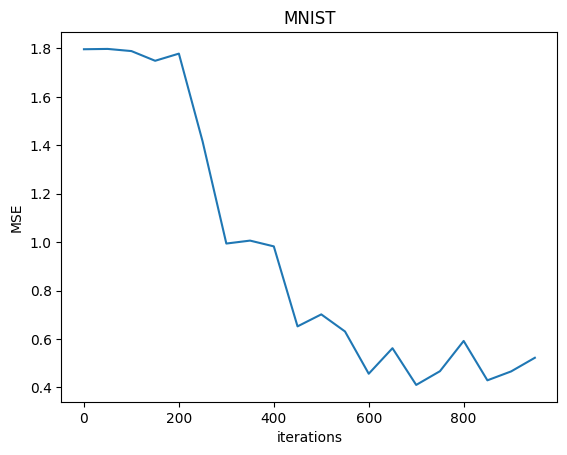

In [17]:
plot_func(nnMNIST.iters,nnMNIST.crossEntropyLoss,"MNIST","Cross Entropy")
plot_func(nnMNIST.iters,nnMNIST.mseLoss,"MNIST","MSE")